In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

# import os
# os.chdir('/content/drive/MyDrive/根據區域微氣候資料預測發電量競賽')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
# 讀取資料
df = pd.read_csv('L16_Train.csv')
df

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,16,2024-03-03 12:23:46.000,0.00,1019.17,32.50,39.88,27306.25,1534.88
1,16,2024-03-03 12:24:42.000,0.78,1019.18,32.80,33.30,54612.50,918.74
2,16,2024-03-03 12:25:42.000,1.05,1019.20,32.55,38.67,66894.06,791.75
3,16,2024-03-03 12:26:42.000,1.39,1019.16,32.05,37.95,58585.31,599.35
4,16,2024-03-03 12:27:42.000,2.53,1019.15,31.90,38.07,61535.78,659.62
...,...,...,...,...,...,...,...,...
83253,16,2024-07-11 18:50:07.000,0.00,1006.63,31.62,100.00,53.33,0.00
83254,16,2024-07-11 18:51:07.000,0.00,1006.57,31.60,100.00,43.33,0.00
83255,16,2024-07-11 18:52:07.000,0.00,1006.57,31.59,100.00,35.00,0.01
83256,16,2024-07-11 18:53:07.000,0.00,1006.58,31.60,100.00,28.33,0.00


In [5]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,83258.0,83258.000000,83258.000000,83258.000000,83258.000000,83258.000000,83258.000000
mean,16.0,0.154032,1012.346247,31.591448,73.397526,26559.387173,302.941950
std,0.0,0.612718,5.015506,7.526727,23.776894,34867.547516,540.690764
min,16.0,0.000000,999.580000,14.900000,11.550000,20.000000,0.000000
25%,16.0,0.000000,1008.800000,26.200000,53.520000,3444.170000,2.560000
50%,16.0,0.000000,1011.500000,31.315000,76.305000,10098.750000,21.120000
75%,16.0,0.000000,1015.600000,35.300000,100.000000,32022.082500,242.127500
max,16.0,8.800000,1027.700000,56.950000,100.000000,117758.200000,2485.560000


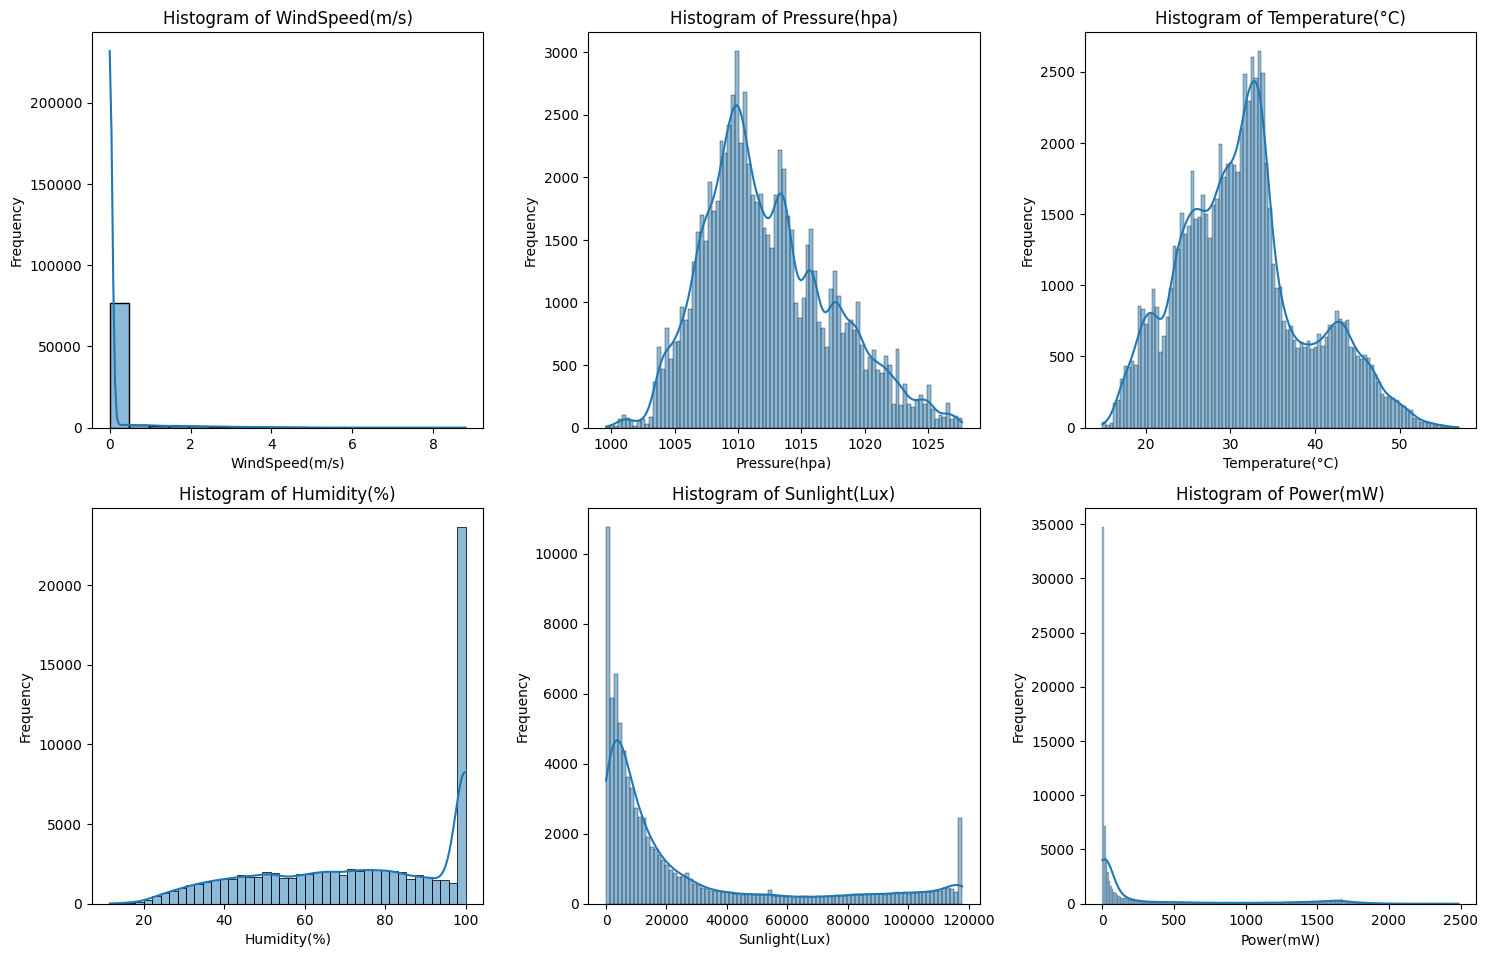

In [6]:
# 繪製直方圖
use_columns = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [7]:
# 篩選Sunlight(Lux)最大值
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] == max_sunlight]
df_filtered

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
1347,16,2024-03-05 10:22:42.000,3.14,1009.45,44.22,17.94,117758.2,1779.29
1348,16,2024-03-05 10:23:42.000,1.74,1009.40,44.59,17.44,117758.2,1802.89
1349,16,2024-03-05 10:24:42.000,1.31,1009.45,44.75,18.49,117758.2,1795.94
1350,16,2024-03-05 10:25:42.000,0.61,1009.49,45.53,19.17,117758.2,1803.67
1351,16,2024-03-05 10:26:42.000,1.39,1009.51,46.11,17.26,117758.2,1788.23
...,...,...,...,...,...,...,...,...
82755,16,2024-07-11 10:31:07.000,0.00,1006.99,42.10,53.03,117758.2,1699.02
82756,16,2024-07-11 10:32:07.000,0.00,1007.01,42.05,53.90,117758.2,1693.44
82757,16,2024-07-11 10:33:07.000,0.00,1006.90,41.53,54.66,117758.2,1706.81
82758,16,2024-07-11 10:34:07.000,0.00,1007.05,41.13,56.18,117758.2,1708.07


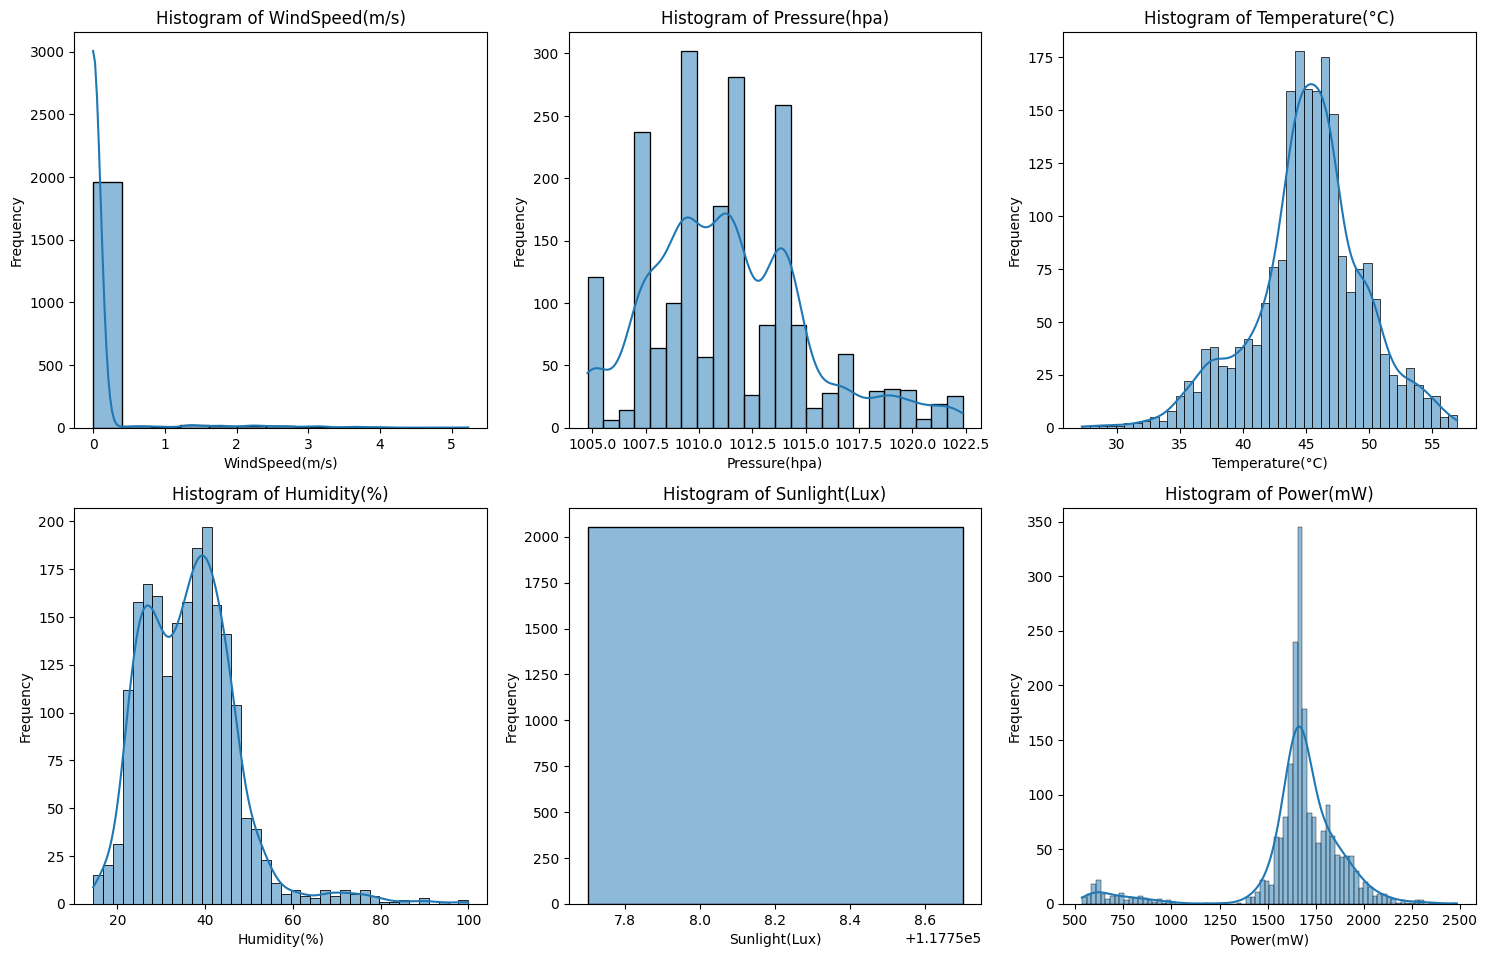

In [8]:
# 繪製直方圖
use_columns = df_filtered[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_filtered[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [9]:
# 利用迴歸分析先分析Sunlight(Lux)數值尚未達到最大值前的Sunlight(Lux)對Power(mW)的比率，回推Power(mW)所產生的Sunlight(Lux)
from sklearn.linear_model import LinearRegression

# 步驟 1：篩選資料（過濾 Sunlight(Lux) 未達到最大值的數據）
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] < max_sunlight]

# 步驟 2：設定自變數與因變數
X = df_filtered[['Sunlight(Lux)']]  # 自變數 (Sunlight)
y = df_filtered['Power(mW)']        # 因變數 (Power)

# 步驟 3：建立線性迴歸模型並進行訓練
model = LinearRegression()
model.fit(X, y)

# 顯示迴歸係數和截距
slope = model.coef_[0]
intercept = model.intercept_

print(f'回歸方程：Power(mW) = {slope:.4f} * Sunlight(Lux) + {intercept:.4f}')

回歸方程：Power(mW) = 0.0150 * Sunlight(Lux) + -94.6162


In [10]:
def calculate_sunlight(power):
    sunlight = (power - intercept) / slope
    return sunlight
slope = 0.015
intercept = -94.6162

# 複製df_filtered
df_filtered = df[df['Sunlight(Lux)'] == df['Sunlight(Lux)'].max()].copy()

# 使用 .loc 指定修改列中的欄位，回推Sunlight(Lux)
df_filtered['Recalculated Sunlight(Lux)'] = df_filtered['Power(mW)'].apply(calculate_sunlight)

# 更新原始df中的Sunlight(Lux)欄位
df.loc[df_filtered.index, 'Sunlight(Lux)'] = df_filtered['Recalculated Sunlight(Lux)']
# df

In [11]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,83258.0,83258.000000,83258.000000,83258.000000,83258.000000,83258.000000,83258.000000
mean,16.0,0.154032,1012.346247,31.591448,73.397526,26525.594288,302.941950
std,0.0,0.612718,5.015506,7.526727,23.776894,34907.903722,540.690764
min,16.0,0.000000,999.580000,14.900000,11.550000,20.000000,0.000000
25%,16.0,0.000000,1008.800000,26.200000,53.520000,3444.170000,2.560000
50%,16.0,0.000000,1011.500000,31.315000,76.305000,10098.750000,21.120000
75%,16.0,0.000000,1015.600000,35.300000,100.000000,32022.082500,242.127500
max,16.0,8.800000,1027.700000,56.950000,100.000000,172011.746667,2485.560000


In [12]:
df['LocationCode'] = df['LocationCode'].apply(lambda x: f'{x:02d}')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# 提取日期時間的相關特徵
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second
df['Weekday'] = df['DateTime'].dt.weekday

df['DateTime'] = df['Year'].astype(str).str.zfill(4) + \
                    df['Month'].astype(str).str.zfill(2) + \
                    df['Day'].astype(str).str.zfill(2) + \
                    df['Hour'].astype(str).str.zfill(2) + \
                    df['Minute'].astype(str).str.zfill(2) + \
                    df['Second'].astype(str).str.zfill(2)
df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second' ,'Weekday'], axis=1)
df['DateTime'] = df['DateTime'].astype('int64')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y%m%d%H%M%S')

# 每10筆資料合併成一筆並計算平均值
# 使用 `groupby` 和 `agg` 方法
df = df.groupby(df.index // 10).agg({
    'LocationCode': 'first',  # 取第一筆的 LocationCode
    'DateTime': 'first',  # 取第一筆的 DateTime
    'WindSpeed(m/s)': 'mean',
    'Pressure(hpa)': 'mean',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Sunlight(Lux)': 'mean',
    'Power(mW)': 'mean',
}).reset_index(drop=True)

df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']] = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']].round(2)

# 將 DateTime 列轉換回原格式
df['DateTime'] = df['DateTime'].dt.strftime('%Y%m%d%H%M%S')

In [13]:
# 將 LocationCode 轉換為字符串
df['LocationCode'] = df['LocationCode'].astype(str)

# 修改 DateTime 的最後兩位數為 LocationCode 的值
df['DateTime'] = df['DateTime'].str.slice(0, -2) + df['LocationCode']

df = df.rename(columns={'DateTime': 'Serial'}) #　序號
df['Serial'] = df['Serial'].astype('int64')
df = df.drop(['LocationCode'], axis=1)
df

,Serial,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,20240303122316,1.32,1019.13,32.25,37.19,56483.07,761.99
1,20240303123316,2.08,1018.96,29.89,40.93,55680.66,565.14
2,20240303124316,1.94,1018.63,31.85,38.24,78143.22,1134.21
3,20240303125316,1.69,1018.38,30.27,40.60,52855.80,504.68
4,20240303130316,1.70,1018.26,30.82,39.62,54882.85,533.07
...,...,...,...,...,...,...,...
8321,20240711180716,0.00,1006.57,32.07,100.00,875.92,0.14
8322,20240711181716,0.00,1006.56,31.98,100.00,677.50,0.11
8323,20240711182716,0.00,1006.53,31.97,100.00,331.00,0.03
8324,20240711183716,0.00,1006.64,31.81,100.00,173.50,0.01


# HEATMAP

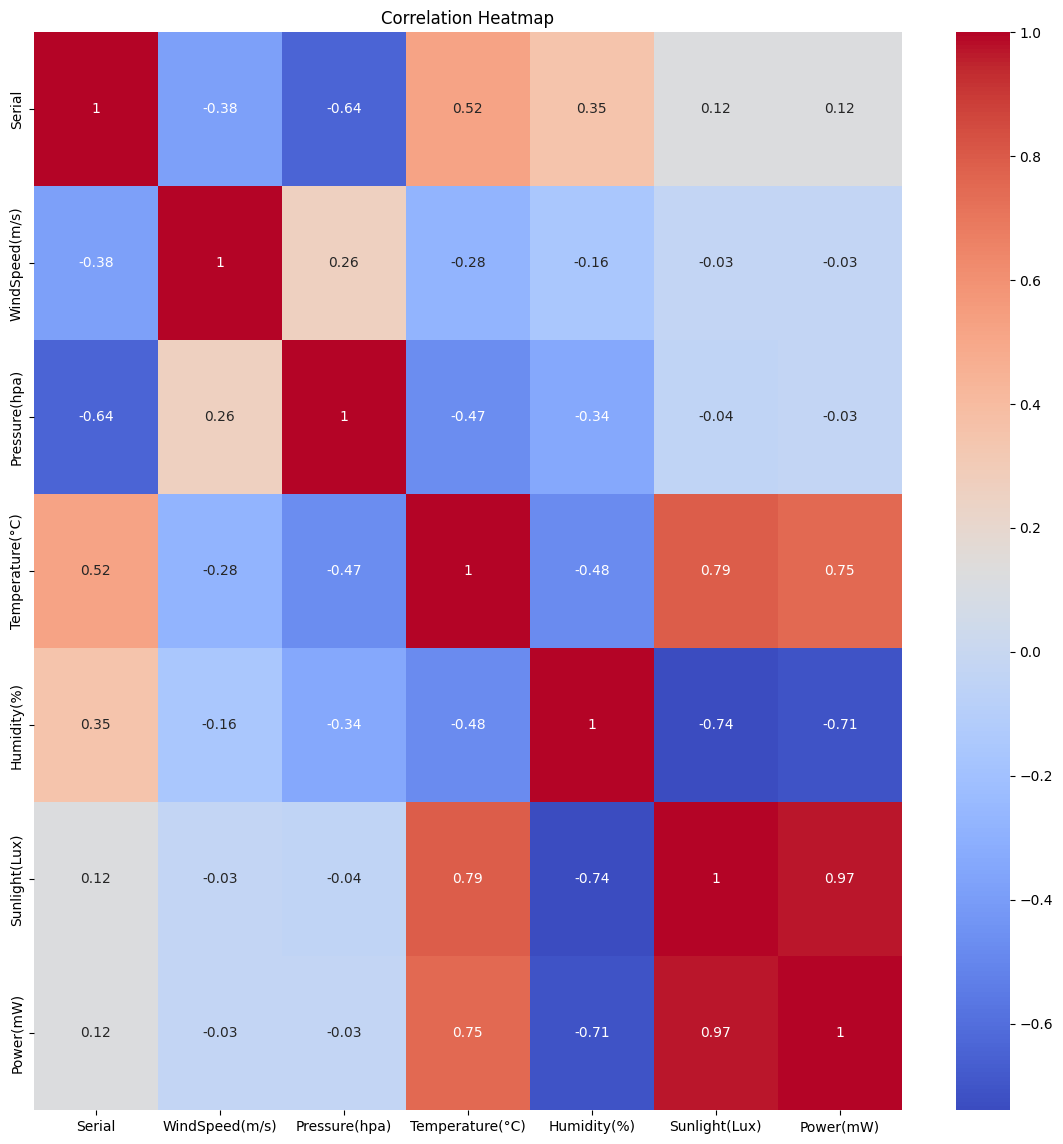

In [14]:
# 繪製熱力圖
plt.figure(figsize=(14, 14))

corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# 相關性絕對值
correlation = df.corr().abs()
top_10_features = correlation['Power(mW)'].sort_values(ascending=False).head(11)
top_10_features

Power(mW)          1.000000
Sunlight(Lux)      0.972745
Temperature(°C)    0.754691
Humidity(%)        0.706322
Serial             0.116555
Pressure(hpa)      0.031683
WindSpeed(m/s)     0.026140
Name: Power(mW), dtype: float64

In [16]:
df.to_csv('L16_Train_Revise.csv', index=False)